# Metadata

```yaml
Course:  DS 5100
Module:  07 Python Classes
Topic:   HW 07 Stock Class
Author:  R.C. Alvarado
Date:    7 July 2023
```

# Student Info

* Name:  Efrain Olivares
* Net UD: dpy8wq
* URL of this file in GitHub:  https://github.com/Niarfe/DS5100-dpy8wq/blob/main/lessons/M07/M07-HW-2-1.ipynb

# Instructions

In your **private course repo on Rivanna**, use this Jupyter notebook and the data file described to write code that performs the tasks below. 

Save your notebook in the `M07` directory.

Remember to add and commit these files to your repo. 

Then push your commits to your repo on GitHib.

Be sure to fill out the **Student Info** block above.

To submit your homework, save the notebook as a PDF and upload it to GradeScope, following the instructions.

**TOTAL POINTS: 12**

# Overview

In this assignment you will define a class and use it to perform the requested tasks.

Before answering the questions, read the market data from `apple_data.csv` into a Pandas dataframe. The file is in the HW for this module in the course repo.

# Setting Up

In [1]:
import pandas as pd
import numpy as np

# Prepare the Data

Read in the dataset from the attached file `apple_data.csv` using `pd.read_csv()`.  

In [2]:
# CODE HERE
data = pd.read_csv('apple_data-2.csv')
data.head()

,date,adj_close
0,2020-01-02,298.829956
1,2020-01-03,295.924713
2,2020-01-06,298.282715
3,2020-01-07,296.879883
4,2020-01-08,301.655548


# Task 1 

(5 PTS) 

Define a class with these features:

**Class Name**: `Stock`

**Attributes**:
- `ticker`: a string to hold the stock symbol
- `sector`: a string to hold the sector name
- `prices`: a dataframe to hold the prices for the stock

**Methods**:
- `print_sector` to just print out the sector string.
- `get_row_count` to count the number of rows in the price dataframe. Set an attribute "price_records" equal to this count.
- `__init__` to build objects. Initialize with the three attribute values passed to the constructor.

In [3]:
# CODE HERE
class Stock:
    def __init__(self, ticker, sector, prices):
        assert isinstance(prices, pd.DataFrame)
        self.ticker = ticker
        self.sector = sector
        self.prices = prices
        self.price_records = 0

    def print_sector(self):
        print(self.sector)

    def get_row_count(self):
        self.price_records = len(self.prices)

# Task 2

(1 PT) 

Create an instance of your class with the these initial values: 
- `ticker`: 'AAPL'
- `sector`: 'technology'
- `prices`: _the imported price dataframe_
          
Then Use the dot operator to print the stock's ticker.   

In [4]:
# CODE HERE
stock = Stock("AAPL", "technology", data)
print(stock.ticker)

AAPL


# Task 3 

(1 PT) 

Use the `print_sector()` method to print the sector.

In [5]:
# CODE HERE
stock.print_sector()

technology


# Task 4 

(2 PTS) 

Use the `get_row_count()` method to compute the number of price records and set price_records.

Use the dot operator to access the stock's price_records, printing the result.

In [6]:
# CODE HERE
stock.get_row_count()
print(stock.price_records)

135


# Task 5

(1 PT) 

Add a new column called `'month'` to the `prices` attribute and put the month number there. 

Hint: You can use `.apply()` with a lambda function to split the month string and keep the second element.

In [9]:
# CODE HERE
stock.prices["month"] = stock.prices.apply(lambda x: x['date'].split('-')[1], axis=1)
stock.prices.head()

,date,adj_close,month
0,2020-01-02,298.829956,01
1,2020-01-03,295.924713,01
2,2020-01-06,298.282715,01
3,2020-01-07,296.879883,01
4,2020-01-08,301.655548,01


# Task 6

(1 PT)

Use `.groupby()` to compute the mean `adj_close` by month. Save your result is a dataframe, not a series.

In [15]:
# CODE HERE
adj_close = stock.prices.groupby('month').agg({'adj_close':'mean'})
assert isinstance(adj_close, pd.DataFrame)
adj_close.head(12)

,adj_close
month,
01,310.337596
02,310.271843
03,261.735581
04,271.650839
05,309.785164
06,345.806360
07,378.385999


# Task 7

(1 PT)
Plot the mean `adj_close` by month using a simple line plot.

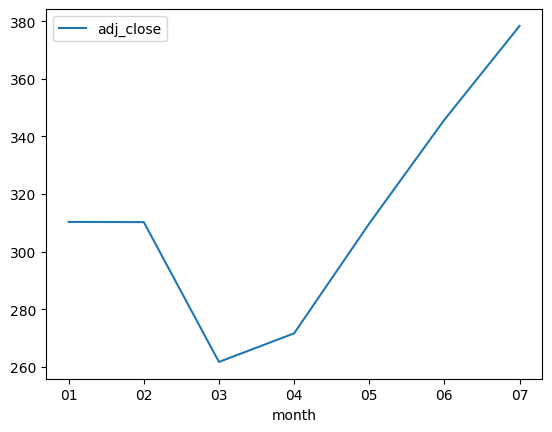

In [17]:
# CODE HERE
adj_close.plot();